## Notebook to produce Figure 2 for for Chiacchierini et al. (2021)

![Figure 2](./figs/PPP_figs_R2_Fig2.png "Figure 2")

In [1]:
import sys
sys.path.append('..\\helperfx')

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib.transforms as transforms

import dabest as db
import pandas as pd
import trompy as tp

from settings4figs import *
from fx4figs import *
from fx4video import *

%matplotlib inline

In [2]:
#Adds control column for calculating vs. 50%
con = [0.5] * 15
df_behav.insert(0, "control", con)

#Initializes details for saving statistics
stats_args = {}
stats_args["file"] = "..\\stats\\estimation_stats.xlsx"
stats_args["file"] = "" # Comment this line out to write a new stats file

# with pd.ExcelWriter(stats_args["file"]) as writer:
#     df_behav["control"].to_excel(writer, sheet_name="front")

### Panel A - forced choice licks

No stats file to write to.


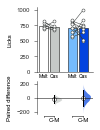

In [3]:
keys = ["pref1_malt_forced", "pref1_cas_forced"]
stats_args["sheet"] = "pref1_forced_licks"
data, df = prep4estimationstats(df_behav, ["NR", "PR"], keys)
fig2A = barscatter_plus_estimation(data, df, ylabel="Licks", stats_args=stats_args)

### Panel B - latencies to lick

No stats file to write to.


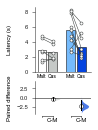

In [4]:
keys = ["pref1_malt_lats_fromsip", "pref1_cas_lats_fromsip"]
stats_args["sheet"] = "pref1_latency"
data, df = prep4estimationstats(df_photo, ["NR", "PR"], keys)
fig2B = barscatter_plus_estimation(data, df, ylabel="Latency (s)", stats_args=stats_args)

### Panel C - tracking data

In [5]:
MASTERFOLDER = "../"

pickle_in = "..\\video\\PPP_video_data.pickle"
with open(pickle_in, "rb") as dill_file:
    PPP_video_data = dill.load(dill_file)
    
THRESHOLD=0.95

Text(0.5, 0, 'Distance from sipper (mm)')

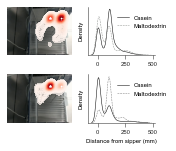

In [6]:
fig2C = plt.figure(figsize=(2.7, 2.3), constrained_layout=False)
gs=fig2C.add_gridspec(nrows=2, ncols=2, left=0.13, right=0.9, top=0.9, bottom=0.2, wspace=0.215, hspace=0.4)

img="..\\video\\PPP1-171017-081744_Eelke-171027-111329_Cam2.jpg"

ax1 = fig2C.add_subplot(gs[0,0])
plot_heatmap(PPP_video_data[4], ax=ax1, img=img, opacity=0.75, threshold=THRESHOLD) 

ax2 = fig2C.add_subplot(gs[1,0])
plot_heatmap(PPP_video_data[0], ax=ax2, img=img, opacity=0.75, threshold=THRESHOLD)

ax3 = fig2C.add_subplot(gs[0,1])
plot_kde_representative(PPP_video_data[4], ax=ax3, colors=['k', 'xkcd:grey'], labels=False, threshold=THRESHOLD)
ax3.set_xlabel("")

ax4 = fig2C.add_subplot(gs[1,1])
plot_kde_representative(PPP_video_data[0], ax=ax4, colors=['k', 'grey'], labels=False, threshold=THRESHOLD)
ax4.set_xlabel("Distance from sipper (mm)")


### Panel D - distance from sipper

C:\ProgramData\Anaconda3\envs\ppp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Average distance from sipper (mm)')

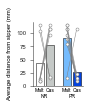

In [7]:
fig2D, ax = plt.subplots(figsize=(1.15, 1.5), gridspec_kw={"left": 0.35, "right": 0.95, "bottom": 0.2, "top": 0.80})

kde_dists_NR, kde_dists_PR = plot_kde_dists(PPP_video_data, ax=ax, threshold=THRESHOLD)
ax.set_ylabel("Average distance from sipper (mm)")

Total distance (in pixels) was 140387.60485207563
Total distance (in pixels) was 111194.78609785979
Total distance (in pixels) was 148452.94415163464
Total distance (in pixels) was 130363.42760728735
Total distance (in pixels) was 130670.94536376778
Total distance (in pixels) was 114224.8395863574
Total distance (in pixels) was 133927.82332924881
Total distance (in pixels) was 68241.39091046804
Total distance (in pixels) was 82914.36662209763
Total distance (in pixels) was 69953.95977912586
Total distance (in pixels) was 40522.80193305408
Total distance (in pixels) was 96864.51652174159
Total distance (in pixels) was 99101.87751524494
Total distance (in pixels) was 122524.28553135936


C:\ProgramData\Anaconda3\envs\ppp\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Total distance moved for NR rats was 97.78 +/- 13.76 mm
Total distance moved for PR rats was 112.83 +/- 9.20 mm
Ttest_indResult(statistic=-0.8728529930097345, pvalue=0.399872343691295)


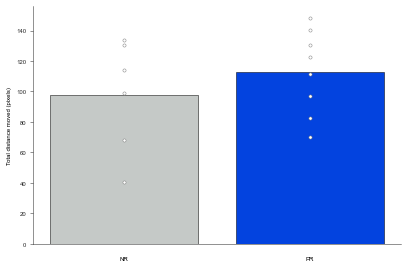

In [8]:
total_dist_NR, total_dist_PR = plot_dist_moved(PPP_video_data, threshold=THRESHOLD, calibration=1000)

NR_dist_stats = tp.mean_and_sem(total_dist_NR)
PR_dist_stats = tp.mean_and_sem(total_dist_PR)

print("Total distance moved for NR rats was {:.2f} +/- {:.2f} mm".format(NR_dist_stats[0], NR_dist_stats[1]))

print("Total distance moved for PR rats was {:.2f} +/- {:.2f} mm".format(PR_dist_stats[0], PR_dist_stats[1]))

print(stats.ttest_ind(total_dist_NR, total_dist_PR))